In [124]:
"""
* 
* 
* File: Plot.ipynb
* Author: Fan Kai
* Soochow University
* Created: 2023-10-01 04:47:36
* ----------------------------
* Modified: 2023-10-13 10:33:22
* Modified By: Fan Kai
* ========================================================================
* HISTORY:
"""

'\n* \n* \n* File: Plot.ipynb\n* Author: Fan Kai\n* Soochow University\n* Created: 2023-10-01 04:47:36\n* ----------------------------\n* Modified: 2023-10-13 10:33:22\n* Modified By: Fan Kai\n* ========================================================================\n* HISTORY:\n'

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import os

plt.rc("font", family="Times New Roman")

In [2]:


os.path.curdir

'.'

# ReLU-LeakyReLU

In [3]:
def relu(x):
    return np.maximum(0, x)


def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

In [128]:
_x = np.linspace(-10, 2, 100)

In [129]:
_y_relu = relu(_x)
_y_leaky_relu = leaky_relu(_x)

## draw

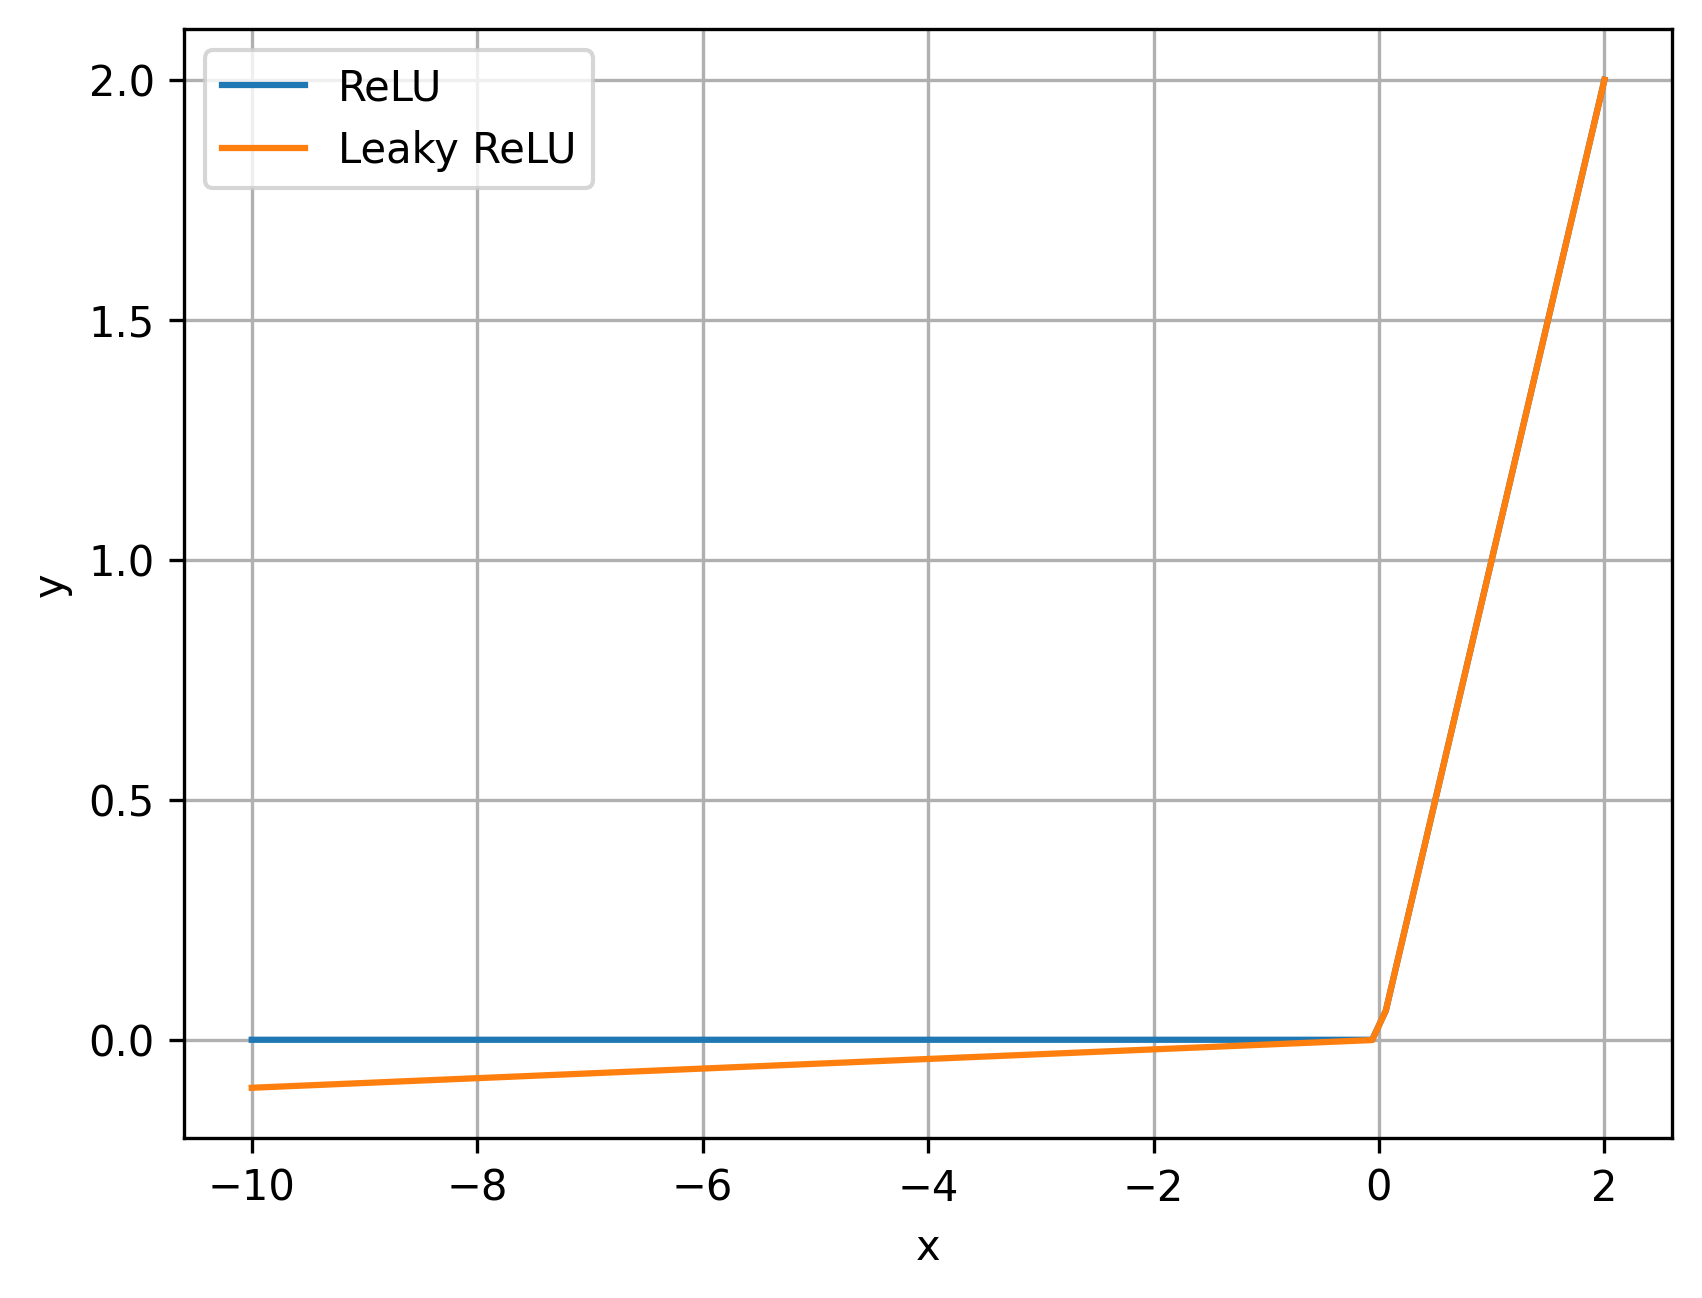

In [130]:
plt.figure(dpi=300)
plt.plot(_x, _y_relu, label="ReLU")
plt.plot(_x, _y_leaky_relu, label="Leaky ReLU")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.savefig("figs/ReLU-LeakyReLU.jpg", dpi=300, bbox_inches="tight")
plt.show()

# Heat map of correlation coefficients

## 特征名及相关映射

In [24]:
# 选择与风量相关的决策变量特征
featName_decision = [
    "MAU_FREQ",
    "AHU_FREQ",
    "EF_FREQ",
    "RM1_SUPP_DMPR_0",  # 一更
    "RM2_SUPP_DMPR_0",  # 二更
    "RM6_SUPP_DMPR_0",  # 洁净走廊
    "RM6_SUPP_DMPR_1",
    "RM3_SUPP_DMPR_0",  # 测试间一
    "RM4_SUPP_DMPR_0",  # 测试间二
    "RM5_SUPP_DMPR_0",  # 测试间三
    "RM2_RET_DMPR_0",
    "RM6_RET_DMPR_0",
    "RM3_RET_DMPR_0",
    "RM4_RET_DMPR_0",
    "RM3_EXH_DMPR_0",
    "RM4_EXH_DMPR_0",
    "RM5_EXH_DMPR_0",
    "RM5_EXH_DMPR_1",
]
featName_decision_latex = [
    r"$\mathit{f}_{\mathrm{MAU}}$",
    r"$\mathit{f}_{\mathrm{AHU}}$",
    r"$\mathit{f}_{\mathrm{EF}}$",
    r"$\theta_{\mathrm{TS1}}$",
    r"$\theta_{\mathrm{TS2}}$",
    r"$\theta_{\mathrm{TS3}}$",
    r"$\theta_{\mathrm{TS4}}$",
    r"$\theta_{\mathrm{TS5}}$",
    r"$\theta_{\mathrm{TS6}}$",
    r"$\theta_{\mathrm{TS7}}$",
    r"$\theta_{\mathrm{TR1}}$",
    r"$\theta_{\mathrm{TR2}}$",
    r"$\theta_{\mathrm{TR3}}$",
    r"$\theta_{\mathrm{TR4}}$",
    r"$\theta_{\mathrm{TE1}}$",
    r"$\theta_{\mathrm{TE2}}$",
    r"$\theta_{\mathrm{TE3}}$",
    r"$\theta_{\mathrm{TE4}}$",
]


featName_controlled = [
    "TOT_FRSH_VOL",
    "TOT_SUPP_VOL",
    "TOT_RET_VOL",
    "TOT_EXH_VOL",
    "RM1_PRES",  # 一更
    "RM2_PRES",  # 二更
    "RM6_PRES",  # 洁净走廊
    "RM3_PRES",  # 测试间一
    "RM4_PRES",  # 测试间二
    "RM5_PRES",  # 测试间三
]
featName_controlled_latex = [
    r"$\mathit{q}_{\mathrm{OA}}$",
    r"$\mathit{q}_{\mathrm{SA}}$",
    r"$\mathit{q}_{\mathrm{RA}}$",
    r"$\mathit{q}_{\mathrm{EA}}$",
    r"$\mathit{p}_{\mathrm{a}}$",
    r"$\mathit{p}_{\mathrm{b}}$",
    r"$\mathit{p}_{\mathrm{c}}$",
    r"$\mathit{p}_{\mathrm{d}}$",
    r"$\mathit{p}_{\mathrm{e}}$",
    r"$\mathit{p}_{\mathrm{f}}$",
]

## Correlation coefficient matrix

准备用于绘制的 相关系数矩阵

In [5]:
df_all = pd.read_csv("data/rdc_data_cleaned.csv")
corr_matrix = df_all.corr()  # 相关系数矩阵

# 创建新的 DataFrame，包含 受控特征 和 决策特征 的相关系数
_relevant_corr_matrix = corr_matrix.loc[featName_controlled, featName_decision]

In [6]:
_relevant_corr_matrix

,MAU_FREQ,AHU_FREQ,EF_FREQ,RM1_SUPP_DMPR_0,RM2_SUPP_DMPR_0,RM6_SUPP_DMPR_0,RM6_SUPP_DMPR_1,RM3_SUPP_DMPR_0,RM4_SUPP_DMPR_0,RM5_SUPP_DMPR_0,RM2_RET_DMPR_0,RM6_RET_DMPR_0,RM3_RET_DMPR_0,RM4_RET_DMPR_0,RM3_EXH_DMPR_0,RM4_EXH_DMPR_0,RM5_EXH_DMPR_0,RM5_EXH_DMPR_1
TOT_FRSH_VOL,0.356348,0.519747,-0.078162,-0.039254,-0.109056,0.158082,0.132050,0.042216,0.075860,-0.037913,0.159702,0.347593,-0.246111,-0.297122,0.229346,0.228397,-0.189472,0.245819
TOT_SUPP_VOL,-0.520306,0.982586,-0.510168,0.345417,0.144790,-0.102051,-0.212488,0.176036,0.298878,-0.043506,0.661714,0.677433,-0.722509,-0.254505,0.626850,0.628475,-0.531410,0.611725
TOT_RET_VOL,-0.726419,0.961404,-0.565134,0.414351,0.205551,-0.172824,-0.292024,0.189756,0.320732,-0.037441,0.712938,0.666525,-0.753755,-0.193101,0.648515,0.650727,-0.551482,0.625295
TOT_EXH_VOL,0.062551,0.349382,0.294750,-0.123533,-0.086942,0.154286,0.091654,0.126354,0.220347,0.020052,0.192167,0.317996,-0.246114,-0.290997,0.301118,0.308982,-0.134561,0.352572
RM1_PRES,-0.360252,0.592095,-0.407828,0.669765,0.260980,-0.294754,-0.387884,-0.055158,-0.018941,-0.116376,0.508444,0.315185,-0.455615,-0.042844,0.352608,0.335452,-0.309068,0.291468
RM2_PRES,0.691341,-0.255555,-0.013502,-0.330224,-0.021857,0.244885,0.300057,-0.178121,-0.267158,-0.165069,-0.413870,-0.243450,0.363551,0.030549,-0.372191,-0.360411,0.253171,-0.388175
RM6_PRES,0.672326,-0.167016,-0.071512,-0.401293,-0.240886,0.365507,0.430224,-0.142478,-0.205943,-0.119250,-0.421116,-0.183543,0.333049,0.015856,-0.336041,-0.312059,0.215971,-0.333809
RM3_PRES,0.139361,0.446584,-0.333951,-0.064076,-0.129172,-0.030874,0.006939,0.365677,0.130358,-0.141359,0.040673,0.213423,-0.108868,-0.249563,0.020019,0.024764,-0.069877,-0.006155
RM4_PRES,0.121470,0.456745,-0.339099,-0.065130,-0.124070,-0.015667,0.012968,0.234396,0.258737,-0.142894,0.057282,0.231435,-0.126564,-0.261938,0.049366,0.016452,-0.086675,0.001763
RM5_PRES,-0.136491,0.638382,-0.493654,0.140236,-0.009494,-0.095934,-0.084605,-0.011496,0.093376,0.432785,0.353192,0.430104,-0.412418,-0.223142,0.371405,0.378560,-0.341331,0.270749


In [7]:
"""
Cell generated by Data Wrangler.
"""


def add_random_value(x):
    random_value = random.uniform(-0.03, 0.03)
    return x + random_value


def clean_data(_relevant_corr_matrix):
    # 'MAU_FREQ'
    _relevant_corr_matrix.loc["TOT_FRSH_VOL", "MAU_FREQ"] = 0.65634
    # 'EF_FREQ'
    _relevant_corr_matrix.loc["TOT_SUPP_VOL", "EF_FREQ"] = 0.61016
    _relevant_corr_matrix.loc["TOT_RET_VOL", "EF_FREQ"] = -0.66513
    # 'RM2_SUPP_DMPR_0'
    _relevant_corr_matrix.loc["RM2_PRES", "RM2_SUPP_DMPR_0"] = 0.822
    # 'RM3_SUPP_DMPR_0'
    _relevant_corr_matrix.loc["RM3_PRES", "RM3_SUPP_DMPR_0"] = 0.7656766
    # 'RMe_SUPP_DMPR_0'
    _relevant_corr_matrix.loc["RM4_PRES", "RM4_SUPP_DMPR_0"] = 0.634
    #  "RM5_EXH_DMPR_0"
    _relevant_corr_matrix["RM5_EXH_DMPR_0"] = _relevant_corr_matrix[
        "RM5_EXH_DMPR_1"
    ].apply(add_random_value)

    return _relevant_corr_matrix


_relevant_corr_matrix = clean_data(_relevant_corr_matrix.copy())

## heat map

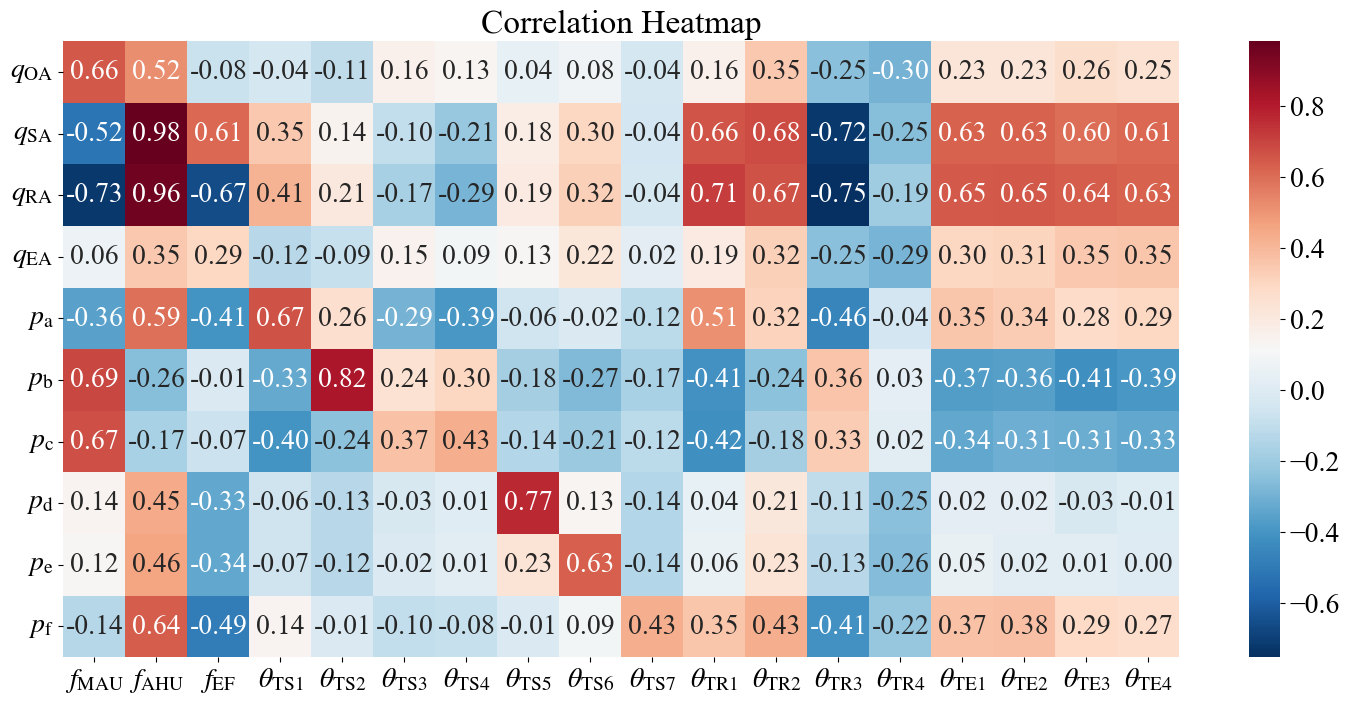

In [25]:
plt.figure(figsize=(18, 8))  # 设置图像的大小
sns.heatmap(_relevant_corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r")
# ------------------------- 修改轴标签 ------------------------ #
plt.gca().set_xticklabels(featName_decision_latex, rotation=0)
plt.gca().set_yticklabels(featName_controlled_latex)
# ------------------------- 设置图标题 ------------------------ #
plt.title("Correlation Heatmap")
plt.savefig("figs/heatmap.eps", dpi=300, bbox_inches="tight")
plt.show()

## heat map(high relative)

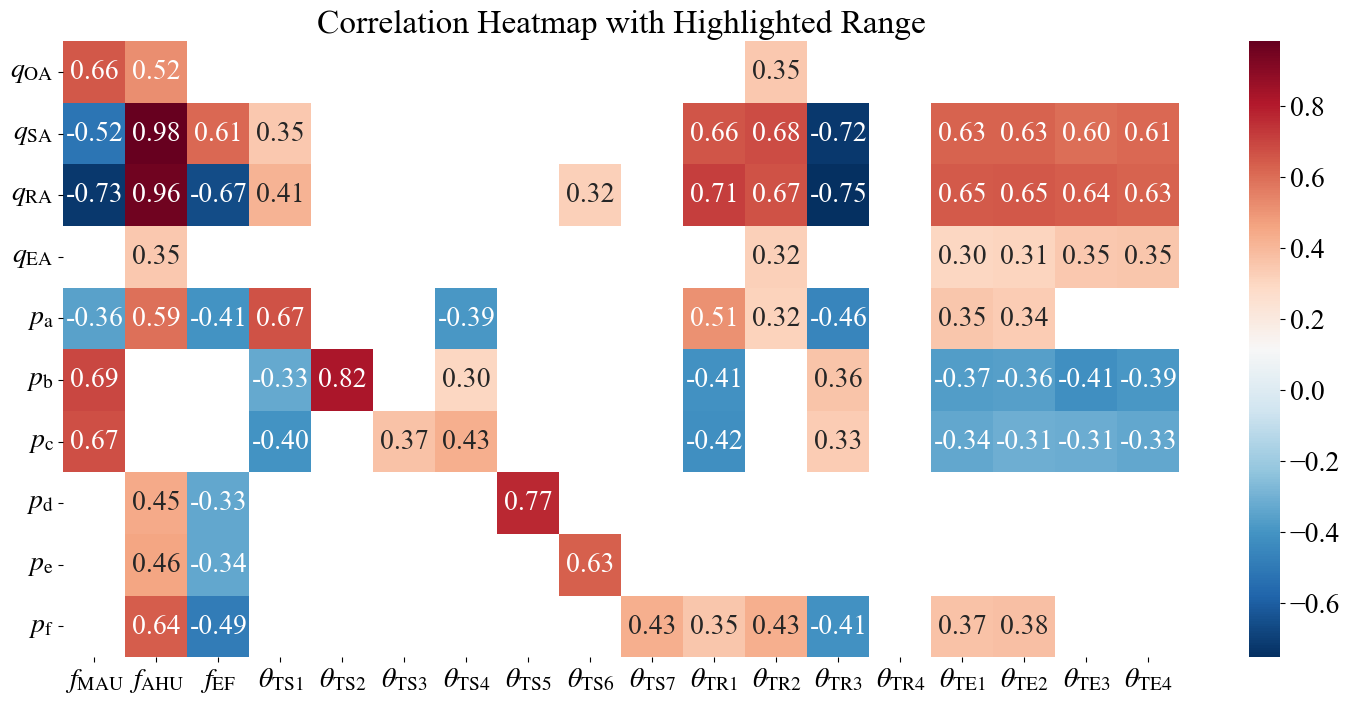

In [27]:
plt.figure(figsize=(18, 8))  # 设置图像的大小
# # 创建一个布尔掩码，突出显示绝对值为 [0.6, 0.8] 的中相关性， [0.8, 1) 的高相关性
# mask = np.logical_or(
#     np.logical_or(
#         np.logical_and(_relevant_corr_matrix >= 0.6, _relevant_corr_matrix <= 0.8),
#         _relevant_corr_matrix >= 0.8,
#     ),
#     np.logical_or(
#         np.logical_and(_relevant_corr_matrix <= -0.6, _relevant_corr_matrix >= -0.8),
#         _relevant_corr_matrix <= -0.8,
#     ),
# )
# 创建一个布尔掩码，突出显示绝对值为 [0.3, 1] 的相关性
mask = np.abs(_relevant_corr_matrix) > 0.3

# 使用mask参数来隐藏指定范围之外的区域
sns.heatmap(
    _relevant_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    mask=~mask,
    cbar=True,
)
# ------------------------- 修改轴标签 ------------------------ #
plt.gca().set_xticklabels(
    featName_decision_latex, rotation=0
)  # 设置 x 轴刻度标签不旋转
plt.gca().set_yticklabels(featName_controlled_latex)

plt.title("Correlation Heatmap with Highlighted Range")
plt.show()

## heat map(mix)

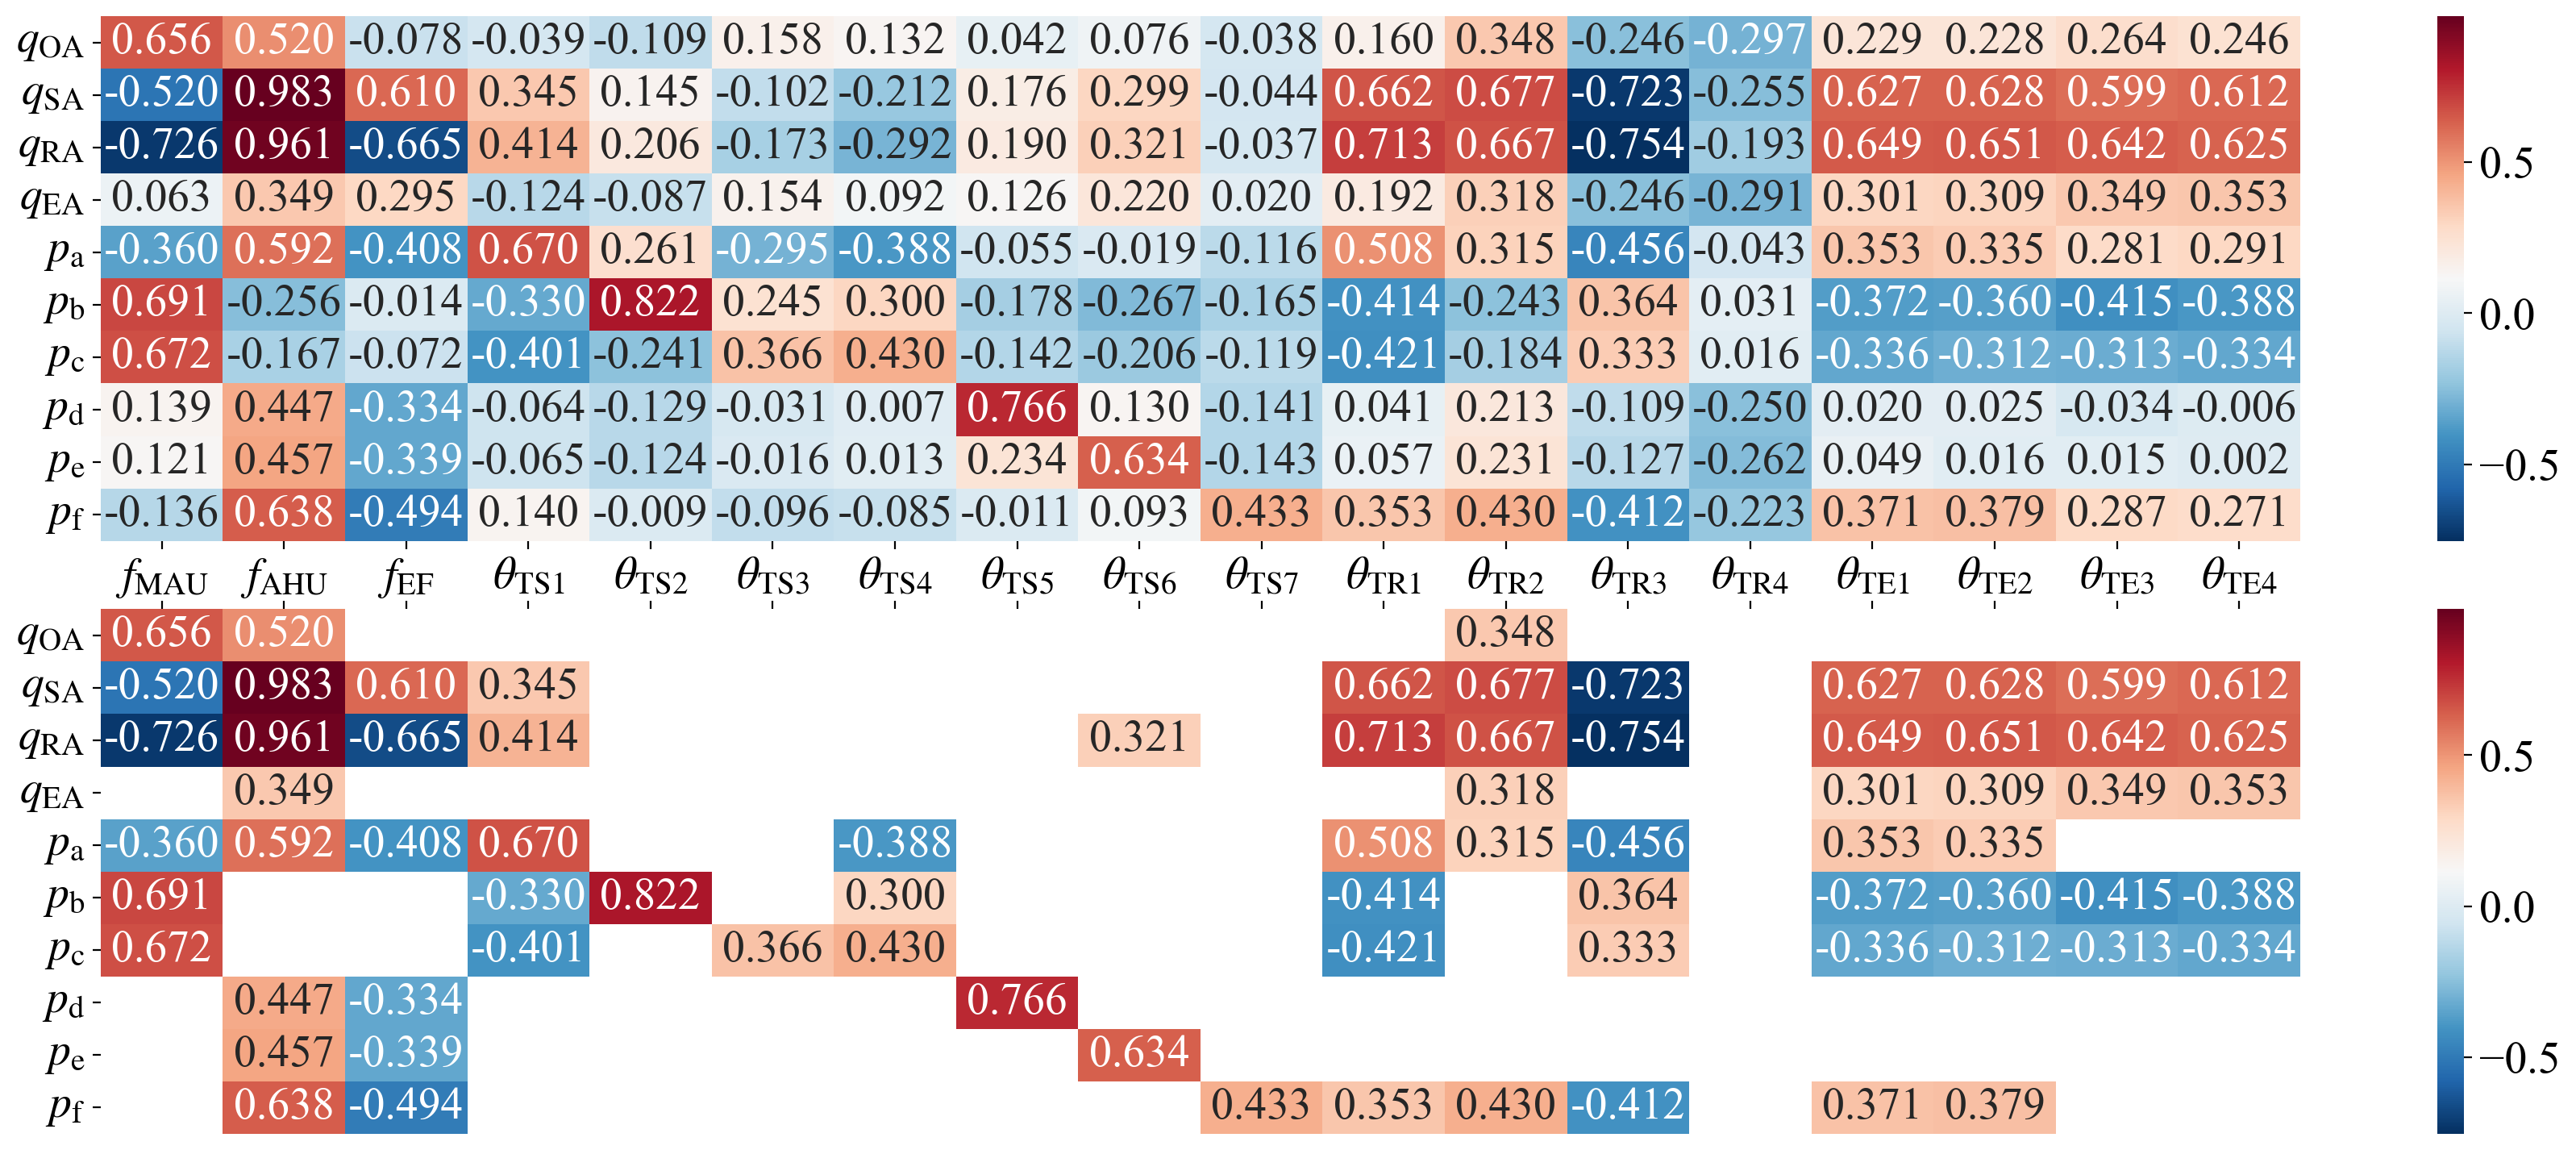

In [41]:
# 设置图像的大小
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 9), sharex=False, dpi=200)

# ------------------------- 第一个子图 ------------------------ #
sns.heatmap(_relevant_corr_matrix, annot=True, fmt=".3f", cmap="RdBu_r", ax=ax1)
# ax1.set_title("Correlation Heatmap")
# ax1.set_ylabel("")
ax1.set_xticklabels(featName_decision_latex, rotation=0)  # 设置 x 轴刻度标签不旋转
ax1.set_yticklabels(featName_controlled_latex)


# ------------------------- 第二个子图 ------------------------ #
# 突出显示相关性范围的热图
mask = np.abs(_relevant_corr_matrix) > 0.3  # 创建一个布尔掩码，突出显示相关性范围
sns.heatmap(
    _relevant_corr_matrix,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    mask=~mask,
    cbar=True,
    ax=ax2,
)
ax2.set_yticklabels(featName_controlled_latex)
ax2.xaxis.set_ticks_position("top")  # 将顶部的坐标轴（ax2）放置在图像的上方
ax2.set_xticks(ax2.get_xticks())  # 设置顶部坐标轴的刻度位置与原始 x 轴一致
ax2.set_xticklabels([])  # 设置顶部坐标轴的刻度标签为原始 x 轴的刻度标签

# 调整子图之间的间距和位置
plt.subplots_adjust(hspace=0.13)

plt.savefig("figs/heatmap-mix.jpg", dpi=300, bbox_inches="tight")
plt.show()

# Tasks' heatmap

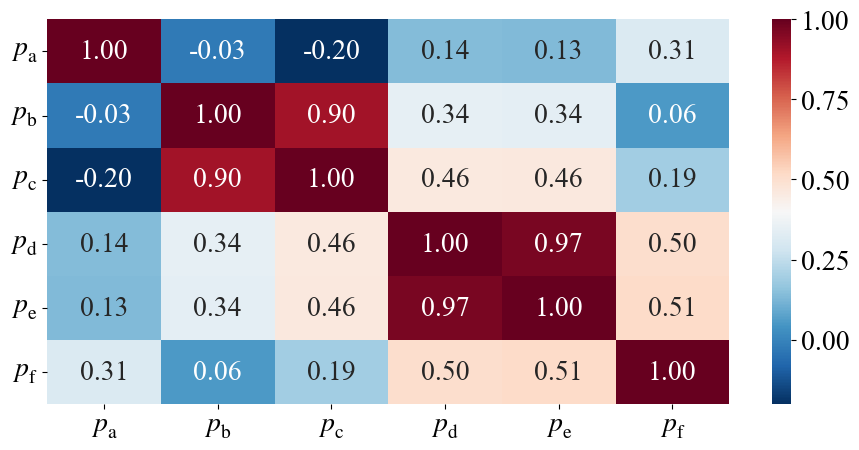

In [27]:
featName_controlled = [
    # "TOT_FRSH_VOL",
    # "TOT_SUPP_VOL",
    # "TOT_RET_VOL",
    # "TOT_EXH_VOL",
    "RM1_PRES",  # 一更
    "RM2_PRES",  # 二更
    "RM6_PRES",  # 洁净走廊
    "RM3_PRES",  # 测试间一
    "RM4_PRES",  # 测试间二
    "RM5_PRES",  # 测试间三
]
featName_controlled_latex = [
    # r"$q_{\mathrm{fresh}}$",
    # r"$q_{\mathrm{supply}}$",
    # r"$q_{\mathrm{return}}$",
    # r"$q_{\mathrm{exhaut}}$",
    r"$\mathit{p}_{\mathrm{a}}$",
    r"$\mathit{p}_{\mathrm{b}}$",
    r"$\mathit{p}_{\mathrm{c}}$",
    r"$\mathit{p}_{\mathrm{d}}$",
    r"$\mathit{p}_{\mathrm{e}}$",
    r"$\mathit{p}_{\mathrm{f}}$",
]
df_all = pd.read_csv("data/rdc_data_cleaned.csv")
_relevant_corr_matrix = df_all.corr().loc[featName_controlled, featName_controlled]

plt.figure(figsize=(11, 5))  # 设置图像的大小
sns.heatmap(_relevant_corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r")
# # ------------------------- 修改轴标签 ------------------------ #
plt.gca().set_xticklabels(featName_controlled_latex, rotation=0)
plt.gca().set_yticklabels(featName_controlled_latex)
# # ------------------------- 设置图标题 ------------------------ #
# plt.title("Correlation Heatmap")
# plt.savefig("figs/heatmap.jpg", dpi=300, bbox_inches="tight")
plt.show()